In [1]:
#Customer Churn Prediction using Decision tree - ID3
#Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt


In [3]:
#Load Dataset
df = pd.read_csv("churn.csv")
df.head()


,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [4]:
#Encode Categorical Columns
df = df.dropna()  # remove missing rows

le = LabelEncoder()

for col in df.columns:
    if df[col].dtype == "object":
        df[col] = le.fit_transform(df[col])


In [5]:
#Split Features and Target
X = df.drop("Churn", axis=1)
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [9]:
#Train the Decision Tree
model = DecisionTreeClassifier(
    criterion="entropy",
    max_depth=3,
    random_state=42
)

model.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [10]:
#Evaluate Model
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9002718446601942

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.90      0.91      6793
           1       0.89      0.90      0.89      6082

    accuracy                           0.90     12875
   macro avg       0.90      0.90      0.90     12875
weighted avg       0.90      0.90      0.90     12875


Confusion Matrix:
 [[6125  668]
 [ 616 5466]]


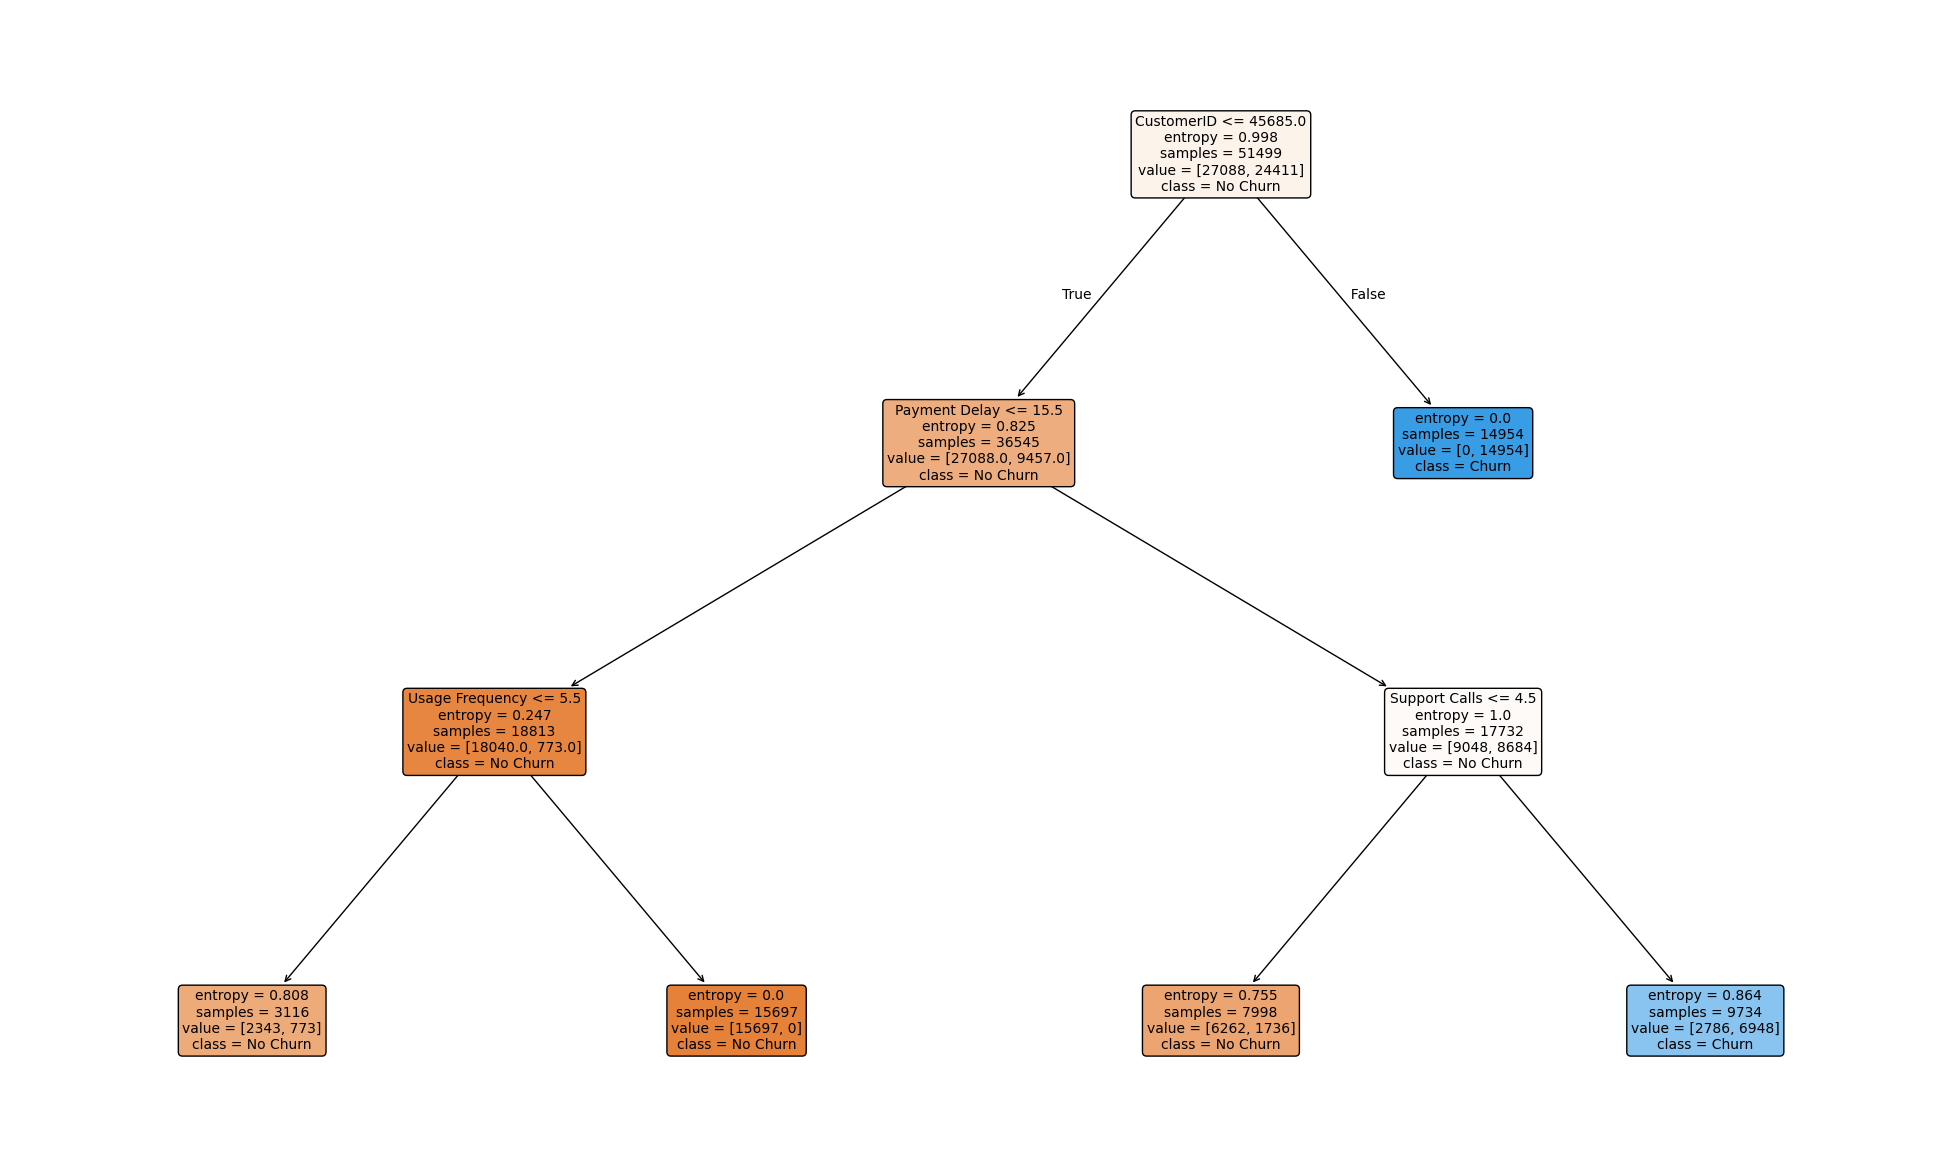

In [11]:
#Plot the Decision Tree
plt.figure(figsize=(25,15))
plot_tree(
    model,
    feature_names=X.columns,
    class_names=["No Churn", "Churn"],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()
